In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ConvLSTM 
> Conv lstm model

In [ ]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [ ]:
PATH = Path.cwd().parent/'data/UCF-101-frames'
Path.BASE_PATH = PATH.parent

In [ ]:
files = get_sequence_paths(PATH)

In [ ]:
len(files)/8

1665.0

In [ ]:
def get_dls(image_size, seq_len, bs=4):
    "get ImageTuple dataloader"
    block = get_block(image_size, seq_len)
    return block.dataloaders(files, bs=bs, drop_last=True)

In [ ]:
seq_len = 20
bs = 8
dls = get_dls(64, seq_len, bs=bs)

In [ ]:
len(dls.valid_ds)%8 == 0 and len(dls.train_ds)%8 == 0

True

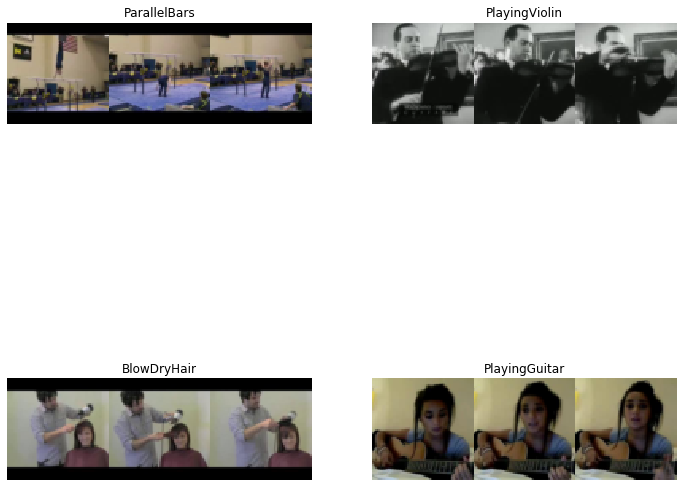

In [ ]:
dls.show_batch()

In [ ]:
model = ConvLSTM(num_classes=dls.c)

In [ ]:
learn = Learner(dls, model, metrics=[accuracy], wd=0.1, cbs=[ModelReseter()], splitter=simple_splitter).to_fp16()
learn.freeze()

SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=0.3019951581954956)

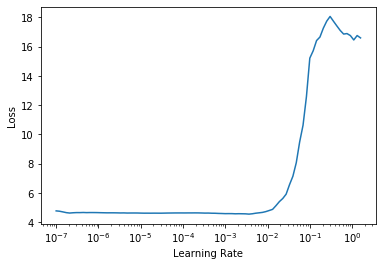

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.386010,1.774309,0.552177,06:38
1,2.481785,2.257585,0.540541,06:38
2,1.703823,1.560881,0.645270,06:38
3,1.403831,1.148929,0.730105,06:38
4,1.058964,0.953269,0.780781,06:38
5,0.790689,0.676041,0.850976,06:38
6,0.615531,0.639760,0.864489,06:38
7,0.417457,0.519842,0.892267,06:38
8,0.266269,0.435028,0.904279,06:38
9,0.270876,0.460014,0.907658,06:38


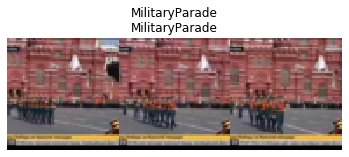

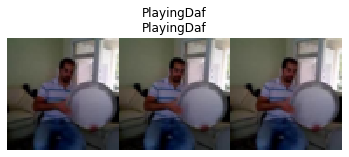

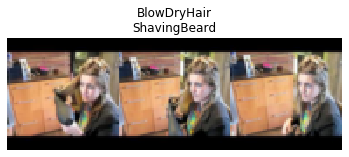

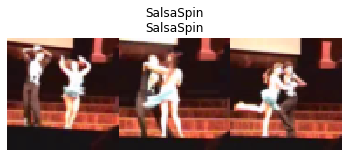

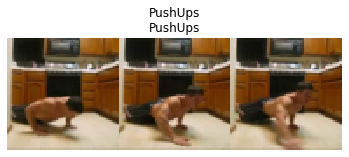

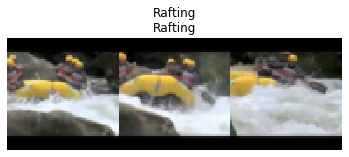

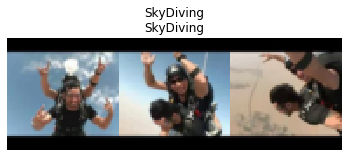

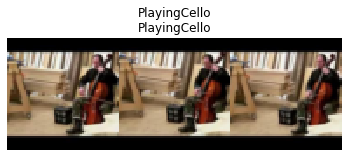

In [ ]:
learn.show_results()